가위바위보 분류기

데이터 준비

데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!") 

PIL 라이브러리 import 완료!


In [2]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1002  images to be resized.
1002  images resized.
가위 이미지 resize 완료!


In [3]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [4]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=3002):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3002 입니다.
x_train shape: (3002, 28, 28, 3)
y_train shape: (3002,)


라벨:  0


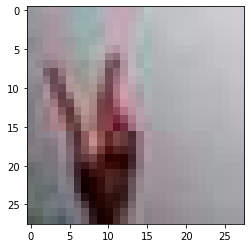

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [19]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))    #Conv2D 레이어의 첫 번째 인자인 16을 64로 증가
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))                          #Conv2D 레이어의 첫 번째 인자인 32를 128로 증가
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))                                   # Dense 레이어의 첫 번째 인자인 32를 64로 증가
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

딥러닝 네트워크 학습시키기

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs = 15)               # 10 epoch정도의 학습도 충분하지만 정확도를 더 높이기 위해 15 epoch로 증가

Epoch 1/15
94/94 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.6952
Epoch 2/15
94/94 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9494
Epoch 3/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9757
Epoch 4/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 5/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 6/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9963
Epoch 7/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9980
Epoch 8/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9983
Epoch 9/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9917
Epoch 10/15
94/94 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9983
Epoch 11/15
94/94 [

테스트

In [22]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/scissor1"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [23]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/rock1"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [24]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/test/paper1"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [25]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [26]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 207.7014 - accuracy: 0.7233
test_loss: 207.70135498046875
test_accuracy: 0.7233333587646484


In [16]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 0. 1.]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


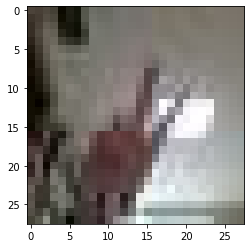

In [17]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


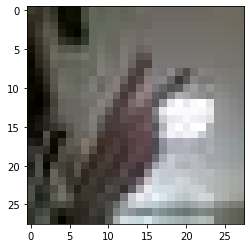

예측확률분포: [0.09051951 0.         0.9094805 ]
라벨: 0, 예측결과: 2


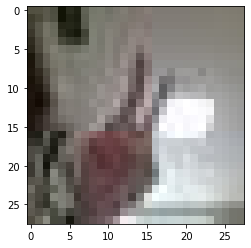

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


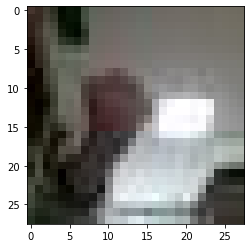

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


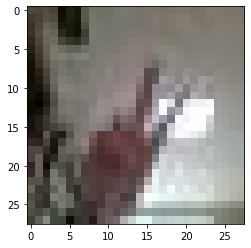

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


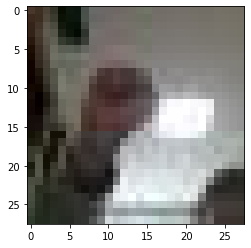

In [18]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

가위바위보 분류기 평가

가위바위보 분류기의 정확도는 최초 33%에서 72%까지 올라갔다. 하지만 깨끗한 이미지를 학습용으로 최대한 많이 부여하였음에도 72%가 나왔다. 이는 질 좋은 이미지가 더 많이 필요하다는 것을 알 수 있다. 물론 테스트용 이미지도 질 좋아야 한다.

EXPLORATION 1 회고

EXPLORATION 1을 하면서 느낀점은 어렵다는 것이었다. 아마 내가 코드와의 거리가 아직 멀어서 그런 것이지 않을까. 그럼에도 불구하고 가위바위보 분류기의 정확도를 높이는데 심혈을 기울여 70%를 넘기는데 성공하였다. 처음에는 33%에서 머물러 무엇이 잘못되었는지 고민하는데 시간을 많이 할애하였다. 벽에 부딪힌 느낌일 정도로 33%를 좀처럼 벗어나지 못했지만 데이터 양과 하이퍼파라미터 조절이 중요하다는 것을 깨닫고 난 이후에 최적의 조건을 찾아낼 수 있었다. 그럼, EXPLORATION 1을 진행할 때 있던 어려움과 그 어려움을 어떤식으로 해결하였는지 좀 더 정확히 작성해 보겠다.

1. 처음 딥러닝 네트워크를 학습시키기 위해 사용한 데이터 양은 가위 50장, 바위, 51장, 보 50장이였다. 정말 적은 양이었다. 정확도가 33%가 나오는 것은 어쩌면 당연한 결과였다. 151장은 매우 적다고 판단되어 가위 300장, 바위 300장, 보 300장을 준비하였다. 총 900장이므로 정확도가 높을 것이라고 생각하였지만, 33%에서 맴돌았다. 그렇다. 900장도 적은 편이었다. 900장까지는 하이퍼파라미터를 아무리 최적의 조건으로 하여도 33%에서 맴돌거나 오히려 더 낮아지는 경우도 생겼다. 4%라는 끔찍한 정확도도 보았다. 데이터의 양을 늘리기 위해 가위, 바위, 보 각각 1000장씩 새로 만들어 총 3002장을 만들어 냈고, 이왕 만들 때 질도 높이자는 생각으로 흰색바탕으로 깔끔하게 만들어냈다. 흰색 바탕을 이용하였더니 28x28사이즈나 그 이상의 사이즈나 큰 차이가 없는 것 같다는 생각이 들어 사이즈는 28x28로 유지하였다. 물론 그 이상의 사이즈를 적용하려 했으나 error가 났다. 에러를 해결하지는 못해 조금 더 알아봐야 한다. 에러내용은 다음과 같다.(ValueError: Input 0 of layer dense is incompatible with the layer)

2. 학습할 데이터의 양과 질을 늘렸으니 하이퍼파라미터의 최적의 조건을 찾아내야 한다. Conv2D 레이어의 첫 번째 인자는 최초 16과 32였으나 64와 128로 최종적으로 증가시켰다. 또한 Dense 레이어의 첫 번째 인자를 최초 32에서 최종적으로 64로 증가시켰다. 마지막으로 학습 반복 횟수인 epoch 값을 10에서 15로 증가시켰다. 10도 충분하지만 적당한 선에서 늘릴수록 정확도가 높아지는 것을 확인하여 가장 최적이라고 판단되는 15로 마무리 하였다.